<a href="https://colab.research.google.com/github/ishaPo/startup_funding_analysis_project/blob/main/Recent_Fuding_Gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the File

In [8]:
# Import all requirements
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots

In [2]:
# Read the Excel file into a dictionary of DataFrames, with keys as sheet names
file_path = '/content/funding_list_original.xls'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Get the sheet names
with pd.ExcelFile(file_path) as xls:
    sheet_names = xls.sheet_names
    sheet_count = len(sheet_names)

# Print the sheet names
print(f'Number of sheets in originally collected data: {sheet_count}\n')
print("Sheet Names:")
for name in sheet_names:
    print(name)

Number of sheets in originally collected data: 16

Sheet Names:
february_2024_funded
India_recent_2024_funded
SAAS_2024_funded
Mobile_Apps_2024_funded
Pharma_2024_Funded
Sports_2024_Funded
Construction_2024_Funded
Legal_2024_Funded
Music_2024_Funded
Data_and_Analytics_2024_Funded
B2C_2024_Funded
Fashion_Satrtup_2024_Funded
Proptech_2024_Funded
Mental_Health_2024_Funded
EV_2024_Funded
Personal_Finance_2024_Funded


In [3]:
# Read the Excel file into a dictionary of DataFrames, with keys as sheet names
file_path = '/content/funding_list.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Get the sheet names
with pd.ExcelFile(file_path) as xls:
    sheet_names = xls.sheet_names
    sheet_count = len(sheet_names)

# Print the sheet names
print(f'Number of sheets in compiled excel: {sheet_count}\n')
print("Sheet Names:")
for name in sheet_names:
    print(name)

Number of sheets in compiled excel: 2

Sheet Names:
all_funded
february_2024_funded


### File Description


* The version right after data collection consisted of the format as below

*   The file has 16 sheets
      * 13 sheets contain 100 rows
      * 1 sheet contains 78 rows
      * 1 sheet contains 84 rows
      * 1 sheet contains 62 rows
* Each of these sheets specify a certain type of data
  * 12 sheets are the startups categorized by the type of the startup such as SAAS, EV and so on
  * 1 sheet contains only february data of startups
*  Total the file contains 1524 comapnies and their funding data
    * mostly from the later period of 2023 to Feb 2024, i.e., most latest data
* This data is from over 10 countries



I combined all the data from the multiple pages in one page

However, I have kept the data of the recntly funded startups in Februrary 2024 separate since they have two useful columns which were not available for others, namely 'Founding Year' and 'City' which we can use later to analyse the Februrary specific list separetly.


So now, our file conatains 2 pages
* page 'all_funded' contains list of all startups (total 1524) separated by 'type' of the startup.
* page 'february_2024_funded' contains the list of startups funded in 2024 (which is also present in the all_funded page); however this page has some useful information and is kept this way for easier analysis later on of the same

We will have to further clean this data before any analysis or visualizations

# Data Cleaning

In [4]:
# Rename the DataFrames using sheet names
main_data = {name: excel_data[name] for name in sheet_names}

# Print the renamed DataFrames
for name, df in main_data.items():
    print(f"DataFrame for sheet '{name}':")
    print(df)
    print("\n")

DataFrame for sheet 'all_funded':
                       Name                          Website  \
0           PierSight Space                  piersight.space   
1             JEH Aerospace                     www.jeh.aero   
2              AquaExchange                 aquaexchange.com   
3             Captain Fresh                  captainfresh.in   
4               Bookingjini                  bookingjini.com   
...                     ...                              ...   
1519               SportVot            https://sportvot.com/   
1520                  River        https://www.rideriver.com   
1521  Starship Technologies         https://www.starship.xyz   
1522   Elemind Technologies          https://elemindtech.com   
1523         ActionStreamer  https://www.actionstreamer.com/   

                                    Industry        Country  \
0                          Aerospace, Marine          India   
1       Aerospace, Manufacturing, Government          India   
2       

In [5]:
#  storing accordinly in two different dataframes
# feb data
feb_data = main_data['february_2024_funded']
feb_data.head()

,name,website,industry,Country,Funding Amount (USD),Funding Type,Funding Date,Founding Year,City
0,Quindar,https://www.quindar.space/,"Aerospace, B2B Software",United States,6000000,Seed,February 2024,2022,Washington
1,Hixson,https://hixson-inc.com,"Architecture, Home Services, B2B Software",United States,503028,Venture - Series Unknown,February 2024,1948,Cincinnati
2,Kore.ai,https://kore.ai,"Artificial Intelligence, B2B Software",United States,150000000,Series D,February 2024,2013,Orlando
3,Proofcheck,https://www.proofcheck.io/,"Artificial Intelligence, B2B Software",Austria,544117,Pre-Seed,February 2024,2022,Vienna
4,Roofer.com,https://roofer.com,"Artificial Intelligence, Drones, B2B Software",United States,7500000,Seed,February 2024,2020,Dallas


In [6]:
# all data
main_df = main_data['all_funded']
main_df.head()

,Name,Website,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,piersight.space,"Aerospace, Marine",India,"$5,324,999",Seed,2024-01-01 00:00:00,India_recent
1,JEH Aerospace,www.jeh.aero,"Aerospace, Manufacturing, Government",India,"$2,525,053",Seed,2024-01-01 00:00:00,India_recent
2,AquaExchange,aquaexchange.com,"Agriculture, B2B Software",India,"$6,000,000",Series A,2024-01-01 00:00:00,India_recent
3,Captain Fresh,captainfresh.in,"Agriculture, Marine, Logistics",India,"$13,206,589",Series C,2024-01-01 00:00:00,India_recent
4,Bookingjini,bookingjini.com,"Analytics, Data, B2B Software",India,NaN,Seed,2024-01-01 00:00:00,India_recent


In [9]:
df = pd.DataFrame(main_df.head())

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='white',
               align='left'))
])

# Update layout for better visibility
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    height=300,  # Adjust height based on number of rows
)


In [10]:
null_items = pd.DataFrame(main_df.isnull().sum())
null_items

,0
Name,0
Website,0
Industry,4
Country,44
Funding Amount (USD),235
Funding Type,0
Funding Date,0
Type,100


In [11]:
# filling numerical missing values with measures of central tendencies
# Impute missing values for numerical columns
# Step 1: Convert 'Funding Amount' to float
main_df['Funding Amount (USD)'] = main_df['Funding Amount (USD)'].str.replace('[\$,]', '', regex=True).astype(float)

# Step 2: Group by 'Funding Type' and calculate median for each group
# we take the median for the respective type of funding and not the entire data
# as different levels of funding will have different amounts of funding
medians = main_df.groupby('Funding Type')['Funding Amount (USD)'].median()

# Step 3: Fill missing values in each group based on its respective median
for funding_type, median_value in medians.items():
    mask = (main_df['Funding Type'] == funding_type) & (main_df['Funding Amount (USD)'].isna())
    main_df.loc[mask, 'Funding Amount (USD)'] = median_value

# Display the DataFrame after handling missing values
main_df.head(10)

,Name,Website,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,piersight.space,"Aerospace, Marine",India,5324999.0,Seed,2024-01-01 00:00:00,India_recent
1,JEH Aerospace,www.jeh.aero,"Aerospace, Manufacturing, Government",India,2525053.0,Seed,2024-01-01 00:00:00,India_recent
2,AquaExchange,aquaexchange.com,"Agriculture, B2B Software",India,6000000.0,Series A,2024-01-01 00:00:00,India_recent
3,Captain Fresh,captainfresh.in,"Agriculture, Marine, Logistics",India,13206589.0,Series C,2024-01-01 00:00:00,India_recent
4,Bookingjini,bookingjini.com,"Analytics, Data, B2B Software",India,2000000.0,Seed,2024-01-01 00:00:00,India_recent
5,Analytics Jobs,analyticsjobs.in,"Analytics, Education, B2B Software",India,2000000.0,Seed,2024-01-01 00:00:00,India_recent
6,Krutrim,olakrutrim.com,"Artificial Intelligence, B2B Software",India,50000000.0,Series A,2024-01-01 00:00:00,India_recent
7,Larkai Healthcare,www.larkai.in,"Artificial Intelligence, Healthcare, B2B Software",India,499449.0,Seed,2024-01-01 00:00:00,India_recent
8,RP tech India,rptechindia.com,B2B Software,India,90201594.0,Venture - Series Unknown,2024-01-01 00:00:00,India_recent
9,MakeO,makeo.app,"Beauty, B2C Software",India,16242517.0,Series D,2024-01-01 00:00:00,India_recent


In [12]:
# dropping Industry null values as such rows are only 4
main_df['Industry'].fillna('Unknown', inplace=True)

In [13]:
# filling Country and Type null values with Unknown
main_df['Country'].fillna('Unknown', inplace=True)
main_df['Type'].fillna('Unknown', inplace=True)

In [14]:
main_df.isnull().sum()

Name                    0
Website                 0
Industry                0
Country                 0
Funding Amount (USD)    0
Funding Type            0
Funding Date            0
Type                    0
dtype: int64

for the sake of this code I am filling with Country and Type values with unknown.
The ideal path I would've followed would have been as follows


*   For Country: manually or updating the database via code by searching the name of the startup and looking up their profile
*   For Type: using summarization techniques, or training a model that searches the similarity between Name and Type of other rows and accordingly fills the null values- for updation via code- or doing the same manually.



In [15]:
# Find duplicate values in the "Name" column
duplicate_names = set(main_df['Name'][main_df['Name'].duplicated(keep=False)].tolist())

print(f"There are total {len(duplicate_names)} duplicates ")
# Display the list of duplicate or non-unique values
print("Names with duplicate or non-unique values:")
print(duplicate_names)

There are total 116 duplicates 
Names with duplicate or non-unique values:
{'Khyaal', 'Nory AI', 'Amber Technologies', 'AtlasPro AI', 'Wellbee', 'Velca', 'SalonInteractive', 'LB Pharmaceuticals', 'Livsn', 'Varlo', 'Spine BioPharma', 'Fanimal', 'HR DataHub', 'Bluedot', 'Vircle', 'HereNOW Help', 'Agilitas', 'SKY ENGINE AI', 'Traits Insights', 'Nexl', 'Bookingjini', 'DGV', 'NYMBUS', 'CondoConta', 'ecoLocked', 'Inbox Health', 'Woovly Shop Socially', 'Impact Analytics', 'VRO Hospitality', 'Genpop Interactive', 'Hello Divorce', 'Layup', 'thymia', 'Norqain', 'Perplexity AI', 'EVhicle Mobility', 'Inspace XR', 'MIRAGGIO', 'Blueprint', 'Tyr', 'Robin AI', 'Ola Electric', 'Wow! Momo', 'Foudys', 'Earthful', 'revitalyze', 'Ratio Therapeutics', 'Trudenty', 'Igloo', 'Safary', 'Reglagene', 'Spellbook', 'Newme', 'Prematch', 'Evify', 'Agenz', 'Chatsie', 'BandLab', 'Manus Neurodynamica', 'Krutrim', 'Castore', 'Sport Alliance', 'Salty', 'Healspan', 'Pine Games', 'Anotherblock', 'Analytics Jobs', 'Unbox the

In [16]:
# let's see what exactly is repeating
repeating_rows = main_df[main_df['Name'].isin(duplicate_names)]
repeating_rows

,Name,Website,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
2,AquaExchange,aquaexchange.com,"Agriculture, B2B Software",India,6000000.0,Series A,2024-01-01 00:00:00,India_recent
4,Bookingjini,bookingjini.com,"Analytics, Data, B2B Software",India,2000000.0,Seed,2024-01-01 00:00:00,India_recent
5,Analytics Jobs,analyticsjobs.in,"Analytics, Education, B2B Software",India,2000000.0,Seed,2024-01-01 00:00:00,India_recent
6,Krutrim,olakrutrim.com,"Artificial Intelligence, B2B Software",India,50000000.0,Series A,2024-01-01 00:00:00,India_recent
9,MakeO,makeo.app,"Beauty, B2C Software",India,16242517.0,Series D,2024-01-01 00:00:00,India_recent
...,...,...,...,...,...,...,...,...
1414,Inbox Health,InboxHealth.com,"Healthcare, FinTech, Finance, Mobile, B2C Soft...",United States,15000000.0,Series A,2021-04-01 00:00:00,Personal_finance
1415,NYMBUS,nymbus.com,"FinTech, Finance, B2C Software",United States,53000000.0,Series C,2021-02-01 00:00:00,Personal_finance
1417,NYMBUS,nymbus.com,"FinTech, Finance, B2C Software",United States,12000000.0,Venture - Series Unknown,2020-06-01 00:00:00,Personal_finance
1421,ShopBack,www.shopback.sg,"FinTech, Retail, Consumer Goods, B2C Software,...",Singapore,30000000.0,Series B,2020-03-01 00:00:00,Personal_finance


In [17]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns

# Now, when you print the DataFrame, it will display all rows and columns
print(repeating_rows['Name'].value_counts())

Bluedot                      4
ShopBack                     3
BandLab                      3
LB Pharmaceuticals           3
MIRAGGIO                     3
EMotorad                     3
Varlo                        3
Sport Alliance               3
Newme                        3
Salty                        3
Bookingjini                  3
Trudenty                     3
NYMBUS                       3
Genpop Interactive           2
Anotherblock                 2
LeanLaw                      2
Sound                        2
DICE                         2
Hal Leonard Corp.            2
Unbox the Dress              2
Audioshake                   2
Hello Divorce                2
Nexl                         2
Orbital Witness              2
Tyr                          2
Steno                        2
Norqain                      2
Robin AI                     2
ecoLocked                    2
OnSiteIQ                     2
AtlasPro AI                  2
revitalyze                   2
Fanimal 

Now, there are following reasons why the names are repeating upon inspection


1.   The startup got different series of funding (like Series A and Series B) and both the data for the same startup is in this database
2. The value repeats in two different types, i.e., the startup is also an Indian company that recently got funding while it is also a SAAS company so the data is in both for the same type, amount and so on with only the Type column different for the specific
3. There are also some mistakes or inconsistencies in the data
    * While checking for Bluedot.co, first it was listed as Personal Finance Type startup and then as an EV startup. I am not sure if this issue is from the side of the person aggregating the data or if the transition was factual.
    * Stuff like this is difficult to crosscheck without thorough research with the direct parties invovled both - the primary data collection/aggregator as well as the startup in question
    * LB Pharma also had a similar issue
    * However, there are also some startups which do fall under two different categories as well correctly
    * Thus, it can be safe to assume, that these startups fall under the different categories and hence occur this way
4. Startups such as Bandlab had 2 same series of funding (namely Series B) which I checked is a real thing!



So, the real question- How do you solve this?

We will take two approaches


*   We will check for every row the combination of "Name", "Funding Amount", "Funding Type", "Funding Date", and "Type" for one row and if it matches with any other combination of another row in the dataset.
    * If all these rows match that means that is is a repeat bogus value and it is safe to just remove these from the main dataframe
    * If they don't match



In [18]:
# Store the 'Name' elements in a list
name_list = main_df['Name'].tolist()

# Create a new DataFrame with the specified columns
subset_df = main_df[['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date', 'Type']]

# Check for duplicate combinations
duplicate_combinations = subset_df[subset_df.duplicated()]

# Print the rows with duplicate combinations
if not duplicate_combinations.empty:
    print("Rows with duplicate combinations:")
    print(duplicate_combinations)
    # Store the "Name" elements in a list
    name_list += duplicate_combinations['Name'].tolist()
else:
    print("No rows with duplicate combinations found.")

# Remove duplicates from the name_list
name_list = list(set(name_list))

Rows with duplicate combinations:
                   Name  Funding Amount (USD)      Funding Type  \
558           ecoLocked              273873.0  Convertible Note   
755  Genpop Interactive             6500000.0              Seed   

            Funding Date          Type  
558  2023-08-01 00:00:00  Construction  
755  2023-03-01 00:00:00         Music  


In [19]:
# Remove one of the rows with duplicate combinations, keeping the first occurrence
main_df = main_df.drop_duplicates(subset=['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date', 'Type'], keep='first')

# Print the updated DataFrame
main_df.head()

,Name,Website,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,piersight.space,"Aerospace, Marine",India,5324999.0,Seed,2024-01-01 00:00:00,India_recent
1,JEH Aerospace,www.jeh.aero,"Aerospace, Manufacturing, Government",India,2525053.0,Seed,2024-01-01 00:00:00,India_recent
2,AquaExchange,aquaexchange.com,"Agriculture, B2B Software",India,6000000.0,Series A,2024-01-01 00:00:00,India_recent
3,Captain Fresh,captainfresh.in,"Agriculture, Marine, Logistics",India,13206589.0,Series C,2024-01-01 00:00:00,India_recent
4,Bookingjini,bookingjini.com,"Analytics, Data, B2B Software",India,2000000.0,Seed,2024-01-01 00:00:00,India_recent


In [20]:
# Store the 'Name' elements in a list
name_list = main_df['Name'].tolist()

# Create a new DataFrame with the specified columns
subset_df = main_df[['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date', 'Type']]

# Check for duplicate combinations with different 'Type' values
duplicate_combinations = subset_df[subset_df.duplicated(subset=['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date'], keep=False)]

# Print the rows with duplicate combinations
if not duplicate_combinations.empty:
    print("Rows with duplicate combinations with different 'Type' values:")
    print(duplicate_combinations)
    # Store the "Name" elements in a list
    name_list += duplicate_combinations['Name'].tolist()
else:
    print("No rows with duplicate combinations with different 'Type' values found.")

# Remove duplicates from the name_list
name_list = list(set(name_list))


Rows with duplicate combinations with different 'Type' values:
                           Name  Funding Amount (USD)  \
2                  AquaExchange             6000000.0   
4                   Bookingjini             2000000.0   
5                Analytics Jobs             2000000.0   
6                       Krutrim            50000000.0   
9                         MakeO            16242517.0   
10                     BuyEazzy             4250000.0   
23                        Salty              650686.0   
24                        Newme             5412868.0   
34                    Wow! Momo            49342331.0   
35              VRO Hospitality            10000000.0   
41                     Healspan              144288.0   
54                        Evify             1300000.0   
59                        Amaha             6015692.0   
60                    HyugaLife              996189.0   
61                     Earthful              397008.0   
73                     EM

In [21]:
# Group by the specified columns and aggregate the 'Type' values
combined_types_df = main_df.groupby(['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date']).agg({'Type': ', '.join}).reset_index()

# Update the 'Type' column in the main DataFrame
main_df['Type'] = main_df.apply(lambda row: combined_types_df.loc[(combined_types_df['Name'] == row['Name']) &
                                                                  (combined_types_df['Funding Amount (USD)'] == row['Funding Amount (USD)']) &
                                                                  (combined_types_df['Funding Type'] == row['Funding Type']) &
                                                                  (combined_types_df['Funding Date'] == row['Funding Date']),
                                                                  'Type'].iloc[0], axis=1)

# Drop duplicates from the main DataFrame, keeping only the first occurrence
main_df = main_df.drop_duplicates(subset=['Name', 'Funding Amount (USD)', 'Funding Type', 'Funding Date'], keep='first')

# Print the updated DataFrame
main_df

<ipython-input-21-c8778100b801>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Website,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,piersight.space,"Aerospace, Marine",India,5.324999e+06,Seed,2024-01-01 00:00:00,India_recent
1,JEH Aerospace,www.jeh.aero,"Aerospace, Manufacturing, Government",India,2.525053e+06,Seed,2024-01-01 00:00:00,India_recent
2,AquaExchange,aquaexchange.com,"Agriculture, B2B Software",India,6.000000e+06,Series A,2024-01-01 00:00:00,"India_recent, SAAS"
3,Captain Fresh,captainfresh.in,"Agriculture, Marine, Logistics",India,1.320659e+07,Series C,2024-01-01 00:00:00,India_recent
4,Bookingjini,bookingjini.com,"Analytics, Data, B2B Software",India,2.000000e+06,Seed,2024-01-01 00:00:00,"India_recent, SAAS, Data_and_Analytics"
5,Analytics Jobs,analyticsjobs.in,"Analytics, Education, B2B Software",India,2.000000e+06,Seed,2024-01-01 00:00:00,"India_recent, SAAS"
6,Krutrim,olakrutrim.com,"Artificial Intelligence, B2B Software",India,5.000000e+07,Series A,2024-01-01 00:00:00,"India_recent, SAAS"
7,Larkai Healthcare,www.larkai.in,"Artificial Intelligence, Healthcare, B2B Software",India,4.994490e+05,Seed,2024-01-01 00:00:00,India_recent
8,RP tech India,rptechindia.com,B2B Software,India,9.020159e+07,Venture - Series Unknown,2024-01-01 00:00:00,India_recent
9,MakeO,makeo.app,"Beauty, B2C Software",India,1.624252e+07,Series D,2024-01-01 00:00:00,"India_recent, B2C"


So ideally if the a 'real' duplicate here will be one with the same combination of 'Name', 'Website', 'Funding Amount (USD)', 'Funding Type', 'Funding Date' and 'Type'.

      Think of it as a concept that our primary key here is not just Name but a combination of the above mentioned columns, i.e., it is a composite key

In [22]:
# Check for duplicates based on the combination of specified columns
duplicate_combinations = main_df.duplicated(subset=['Name', 'Website', 'Funding Amount (USD)', 'Funding Type', 'Funding Date', 'Type'], keep=False)

# Filter the DataFrame to include only the duplicate rows
duplicate_rows = main_df[duplicate_combinations]

# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Name, Website, Industry, Country, Funding Amount (USD), Funding Type, Funding Date, Type]
Index: []


Thus, now we have a clean data with no duplicates or null values.

In [23]:
main_df.shape

(1442, 8)

So now we hace 1442 rows reduced from the initial 1524.
Around 5.38% of data was corrupt which we have cleaned.

In [24]:
df = pd.DataFrame(main_df.head())

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='white',
               align='left'))
])

# Update layout for better visibility
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    height=300,  # Adjust height based on number of rows
)


# Data Pre-processing

In [25]:
# correcting types of columns
main_df['Funding Date'] = pd.to_datetime(main_df['Funding Date'])

# Print the updated data types
print(main_df.dtypes)

Name                            object
Website                         object
Industry                        object
Country                         object
Funding Amount (USD)           float64
Funding Type                    object
Funding Date            datetime64[ns]
Type                            object
dtype: object


In [26]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1523
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  1442 non-null   object        
 1   Website               1442 non-null   object        
 2   Industry              1442 non-null   object        
 3   Country               1442 non-null   object        
 4   Funding Amount (USD)  1442 non-null   float64       
 5   Funding Type          1442 non-null   object        
 6   Funding Date          1442 non-null   datetime64[ns]
 7   Type                  1442 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 133.7+ KB


In [27]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding Amount (USD),1442.0,2.592086e+07,1.911857e+08,10000.0,1588236.0,4064255.0,12000000.0,6.400000e+09


Also, we are not doing one-hot encoding since it is not required as of now and we can do with string

In [28]:
# Extract unique elements from the 'Industry' column for all rows
industries = set(main_df['Industry'].str.split(', ').sum())

# Print
print(f'{len(industries)} Industries\n{industries}')

91 Industries
{'Fashion', 'Insurance', 'Security', 'Marine', 'Cannabis', 'Information Technology', 'B2B Software', 'Sports', 'Architecture', 'FinTech', 'Materials', 'Accounting', 'Pets', 'Finance', 'Virtual Reality', 'Legal', 'Wearables', 'Recruiting', 'Investing', 'Music', 'Food and Beverage', 'EV', 'Audio', 'Travel', 'Education', 'Beauty', 'Mental Health', 'Hardware', 'Community', 'Electronics', 'Consumer Goods', 'Agriculture', 'Email', 'Quantum Computing', 'Mechanical Engineering', 'Drones', 'Hospitality', 'Government', 'Advertising', 'Alcohol', 'Automotive', 'Analytics', 'Professional Services', 'Biotechnology', 'Environment', 'Fitness', 'Aerospace', 'Esports', 'Sales', 'Property Management', 'Blockchain', 'Construction', 'Telecommunications', 'Gambling', 'Cloud Computing', 'Energy', 'Artificial Intelligence', 'Logistics', 'Aviation', 'Healthcare', 'E-commerce', 'Augmented Reality', 'Cyber Security', 'Real Estate', 'Chemicals', 'Media', 'Data', 'Personal Development', 'Nutrition an

In [31]:
type_counts = main_df['Funding Type'].value_counts()

# Convert Series to DataFrame
type_counts_df = pd.DataFrame({'Funding Type': type_counts.index, 'Count': type_counts.values})

# Create table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Funding Type", "Count"],
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[type_counts_df["Funding Type"], type_counts_df["Count"]],
               fill_color='white',
               align='left'))
])

# Update layout for better visibility
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    height=400  # Adjust height based on number of rows
)

# Show table
fig.show()

In [32]:
# Trim leading and trailing whitespaces from column names
# I am doing this as only "Website" was giving an error as there might
# have been leading or trailing whitespaces in it
main_df.columns = main_df.columns.str.strip()

# Drop the 'Website' column
main_df.drop('Website', inplace=True, axis=1)

In [33]:
main_df.head(10)

,Name,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,"Aerospace, Marine",India,5324999.0,Seed,2024-01-01,India_recent
1,JEH Aerospace,"Aerospace, Manufacturing, Government",India,2525053.0,Seed,2024-01-01,India_recent
2,AquaExchange,"Agriculture, B2B Software",India,6000000.0,Series A,2024-01-01,"India_recent, SAAS"
3,Captain Fresh,"Agriculture, Marine, Logistics",India,13206589.0,Series C,2024-01-01,India_recent
4,Bookingjini,"Analytics, Data, B2B Software",India,2000000.0,Seed,2024-01-01,"India_recent, SAAS, Data_and_Analytics"
5,Analytics Jobs,"Analytics, Education, B2B Software",India,2000000.0,Seed,2024-01-01,"India_recent, SAAS"
6,Krutrim,"Artificial Intelligence, B2B Software",India,50000000.0,Series A,2024-01-01,"India_recent, SAAS"
7,Larkai Healthcare,"Artificial Intelligence, Healthcare, B2B Software",India,499449.0,Seed,2024-01-01,India_recent
8,RP tech India,B2B Software,India,90201594.0,Venture - Series Unknown,2024-01-01,India_recent
9,MakeO,"Beauty, B2C Software",India,16242517.0,Series D,2024-01-01,"India_recent, B2C"


# EDA

In [35]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding Amount (USD),1442.0,2.592086e+07,1.911857e+08,10000.0,1588236.0,4064255.0,12000000.0,6.400000e+09


### Most Occruing Industry



*   First we check combination wise
*   Then we check one by one



In [36]:
# Count the occurrences of each industry
industry_counts = main_df['Industry'].str.split(',').explode().str.strip().value_counts()

# Get the top 5 most recurring industries
top_10_recurring_industries = industry_counts.head(10)

print("Top 10 most recurring individual industries:")
print(top_10_recurring_industries)

Top 10 most recurring individual industries:
B2B Software               813
B2C Software               237
Artificial Intelligence    185
Healthcare                 140
Finance                    130
Mobile                     120
Data                       116
Sports                     103
Fashion                    102
EV                         102
Name: Industry, dtype: int64


In [37]:
# Extract industry names and counts
industries = top_10_recurring_industries.index.tolist()
counts = top_10_recurring_industries.values.tolist()

# Create histogram
fig = go.Figure([go.Bar(x=industries, y=counts)])

# Update layout
fig.update_layout(
    title="Top 10 Most Recurring Individual Industries",
    xaxis_title="Industry",
    yaxis_title="Count"
)

# Show histogram
fig.show()

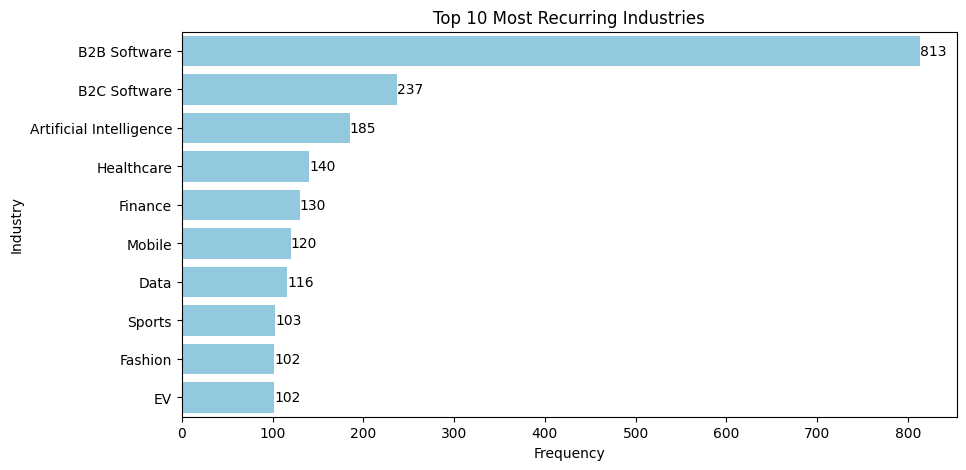

In [38]:
# Plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_recurring_industries.values, y=top_10_recurring_industries.index, color='skyblue')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Industry')
plt.title('Top 10 Most Recurring Industries')

# Add value labels to each bar
for i, v in enumerate(top_10_recurring_industries.values):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.show()

How many startups were funded in each country

In [39]:
# Group by 'Country' and count the number of rows
country_counts = main_df['Country'].value_counts()

# Create a bar chart
fig = px.bar(country_counts, x=country_counts.values, y=country_counts.index,
             orientation='h',
             labels={'x': 'Number of Startups', 'y': 'Country'},
             title='Number of Startups Funded in each Country')

# Show the interactive plot
fig.show()

In [44]:
main_df.head()

,Name,Industry,Country,Funding Amount (USD),Funding Type,Funding Date,Type
0,PierSight Space,"Aerospace, Marine",India,5324999.0,Seed,2024-01-01,India_recent
1,JEH Aerospace,"Aerospace, Manufacturing, Government",India,2525053.0,Seed,2024-01-01,India_recent
2,AquaExchange,"Agriculture, B2B Software",India,6000000.0,Series A,2024-01-01,"India_recent, SAAS"
3,Captain Fresh,"Agriculture, Marine, Logistics",India,13206589.0,Series C,2024-01-01,India_recent
4,Bookingjini,"Analytics, Data, B2B Software",India,2000000.0,Seed,2024-01-01,"India_recent, SAAS, Data_and_Analytics"


In [97]:
'''
Here even if 1 startup is founded in say Country A,
it can still have more than 1 industries displayed
as the same startup can fall under more than 1
industries
So this merely relects, the occurences of Industry types alone
for each country
'''
## Create a copy of the dataset
df_copy = main_df.copy()

# Split industries into individual entries and explode the resulting Series
df_copy['Industry'] = df_copy['Industry'].str.split(', ')
df_copy = df_copy.explode('Industry')

# Group by 'Country' and 'Industry', then count the occurrences of each industry for each country
industry_counts_by_country = df_copy.groupby(['Country', 'Industry']).size().reset_index(name='Count')

# Get the top 10 most recurring industries for each country
top_10_by_country = industry_counts_by_country.groupby('Country').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

# Set the aesthetic color
color = '#B5838D'

# Determine the number of countries
num_countries = len(top_10_by_country['Country'].unique())

# Calculate the figure size based on the number of countries
fig_height = num_countries * 5

# Create subplots for each country
fig = make_subplots(rows=num_countries, cols=1, subplot_titles=top_10_by_country['Country'].unique())

# Populate subplots with horizontal bar charts for each country
for i, country in enumerate(top_10_by_country['Country'].unique()):
    country_data = top_10_by_country[top_10_by_country['Country'] == country]
    fig.add_trace(go.Bar(y=country_data['Industry'], x=country_data['Count'], orientation='h', marker_color=color), row=i+1, col=1)
    fig.update_yaxes(title_text='Industry', row=i+1, col=1)
    fig.update_xaxes(title_text='Number of Startups', row=i+1, col=1)

    # Add counts on each bar
    for idx, value in enumerate(country_data['Count']):
        fig.add_annotation(text=str(value), x=value, y=country_data['Industry'].iloc[idx], showarrow=False)

    # Set subplot title
    fig.update_yaxes(title=f"Top Most recurring Industries for country {country}", row=i+1, col=1)

# Update layout
fig.update_layout(height=fig_height*100, width=800, showlegend=False)

# Show the plot
fig.show()

In [96]:
'''
Here even if 1 startup is founded in say Country A,
it can still have more than 1 industries displayed
as the same startup can fall under more than 1
industries
So this merely relects, the occurences of Industry types alone
for each country
'''

## Create a copy of the dataset
df_copy = main_df.copy()

# Split industries into individual entries and explode the resulting Series
df_copy['Industry'] = df_copy['Industry'].str.split(', ')
df_copy = df_copy.explode('Industry')

# Group by 'Country' and 'Industry', then count the occurrences of each industry for each country
industry_counts_by_country = df_copy.groupby(['Country', 'Industry']).size().reset_index(name='Count')

# Get the top 10 most recurring industries for each country
top_10_by_country = industry_counts_by_country.groupby('Country').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

# Set the aesthetic color
color = '#B5838D'

# Determine the number of countries
num_countries = len(top_10_by_country['Country'].unique())

# Calculate the figure size based on the number of countries
fig_height = num_countries * 5

# Create subplots for each country
fig = make_subplots(rows=num_countries, cols=1, subplot_titles=top_10_by_country['Country'].unique())

# Populate subplots with horizontal bar charts for each country
for i, country in enumerate(top_10_by_country['Country'].unique()):
    country_data = top_10_by_country[top_10_by_country['Country'] == country]
    total_count = country_data['Count'].sum()
    percentages = country_data['Count'] / total_count * 100

    fig.add_trace(go.Bar(y=country_data['Industry'], x=percentages, orientation='h', marker_color=color), row=i+1, col=1)
    fig.update_yaxes(title_text='Industry', row=i+1, col=1)
    fig.update_xaxes(title_text='Percentage of Startups', row=i+1, col=1)

    # Add percentages on each bar
    for idx, value in enumerate(percentages):
        fig.add_annotation(text=f"{value:.2f}%", x=value, y=country_data['Industry'].iloc[idx], showarrow=False)

    # Set subplot title
    fig.update_yaxes(title=f"Top Most recurring Industries for country {country}", row=i+1, col=1)

# Update layout
fig.update_layout(height=fig_height*100, width=800, showlegend=False)

# Show the plot
fig.show()

In [70]:
# Create a copy of the dataset
df_copy = main_df.copy()

# Split industries into individual entries and explode the resulting Series
df_copy['Industry'] = df_copy['Industry'].str.split(', ')
df_copy = df_copy.explode('Industry')

# Group by 'Country' and 'Industry', then sum the funding amount for each industry for each country
funding_amount_by_country = df_copy.groupby(['Country', 'Industry'])['Funding Amount (USD)'].sum().reset_index()

# Get the top 10 industries by funding amount for each country
top_10_by_country = funding_amount_by_country.groupby('Country').apply(lambda x: x.nlargest(10, 'Funding Amount (USD)')).reset_index(drop=True)

# Set the aesthetic color
color = '#B5838D'

# Determine the number of countries
num_countries = len(top_10_by_country['Country'].unique())

# Calculate the figure size based on the number of countries
fig_height = num_countries * 400

# Create subplots for each country
fig = make_subplots(rows=num_countries, cols=1, subplot_titles=top_10_by_country['Country'].unique())

# Populate subplots with horizontal bar charts for each country
for i, country in enumerate(top_10_by_country['Country'].unique()):
    country_data = top_10_by_country[top_10_by_country['Country'] == country]
    fig.add_trace(go.Bar(y=country_data['Industry'], x=country_data['Funding Amount (USD)'], orientation='h', marker_color=color), row=i+1, col=1)
    fig.update_yaxes(title_text='Industry', row=i+1, col=1)
    fig.update_xaxes(title_text='Funding Amount (USD)', row=i+1, col=1)

    # Add funding amount on each bar
    for idx, value in enumerate(country_data['Funding Amount (USD)']):
        fig.add_annotation(text=f"${value:,.0f}", x=value, y=country_data['Industry'].iloc[idx], showarrow=False)

# Update layout
fig.update_layout(height=fig_height, width=800, showlegend=False)

# Show the plot
fig.show()

In [71]:
# Calculate the total funding amount
total_funding = main_df['Funding Amount (USD)'].sum()

# Calculate the funding amount for each country
funding_by_country = main_df.groupby('Country')['Funding Amount (USD)'].sum().reset_index()

# Sort the countries by funding amount and select the top 10
top_10_countries = funding_by_country.nlargest(10, 'Funding Amount (USD)')

# Calculate the funding percentage for each top country
top_10_countries['Funding Percentage'] = top_10_countries['Funding Amount (USD)'] / total_funding * 100

# Convert funding amounts to billions for display in legend
top_10_countries['Funding Amount (Billions)'] = top_10_countries['Funding Amount (USD)'] / 1e9

# Create a pie chart
fig = px.pie(top_10_countries, values='Funding Amount (USD)', names='Country',
             title='Top 10 Countries by Funding Amount',
             hover_data={'Funding Percentage': True, 'Funding Amount (Billions)': False},
             labels={'Funding Amount (USD)': 'Funding Amount', 'Country': 'Country'},
             )

# Modify legend labels to display funding amounts in billions
for trace, country in zip(fig.data, top_10_countries['Country']):
    trace.name = f'{country} (${top_10_countries[top_10_countries["Country"] == country]["Funding Amount (Billions)"].iloc[0]:.2f}B)'

# Show the plot
fig.show()


In [76]:
# Create a table
table_data = top_10_countries[['Country', 'Funding Amount (USD)', 'Funding Percentage']].copy()
table_data['Funding Amount (Billions)'] = table_data['Funding Amount (USD)'] / 1e9
table_data = table_data.rename(columns={'Funding Amount (USD)': 'Funding Amount'})

fig = go.Figure(data=[go.Table(
    header=dict(values=['Country', 'Funding Amount', 'Funding Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[table_data['Country'], table_data['Funding Amount'], table_data['Funding Percentage']],
               fill_color='lavender',
               align='left'))
])

# Update layout
fig.update_layout(
    title='Funding Amount by Country',
    height = 500
)

# Show the table
fig.show()


In [78]:
# Type of funding count

# Group the data by Funding Type and count the number of startups
overall_startup_counts = main_df.groupby('Funding Type').size().reset_index(name='Count')

# Create the histogram
fig = px.bar(overall_startup_counts, x='Funding Type', y='Count',
             labels={'Count': 'Number of Startups', 'Funding Type': 'Funding Type'},
             title='Overall Number of Startups by Funding Type',
             color_discrete_sequence=px.colors.qualitative.Dark24)

# Add text annotations to display the count on top of each bar
for i, count in enumerate(overall_startup_counts['Count']):
    fig.add_annotation(x=overall_startup_counts['Funding Type'][i], y=count,
                       text=str(count), showarrow=False)

# Update layout
fig.update_layout(xaxis_title='Funding Type', yaxis_title='Number of Startups', showlegend=False)

# Show the plot
fig.show()

In [79]:
# Create the line plot
fig = px.line(overall_startup_counts, x='Funding Type', y='Count',
              labels={'Count': 'Number of Startups', 'Funding Type': 'Funding Type'},
              title='Overall Number of Startups by Funding Type',
              color_discrete_sequence=px.colors.qualitative.Dark24)

# Update layout
fig.update_layout(xaxis_title='Funding Type', yaxis_title='Number of Startups', showlegend=False)

# Show the plot
fig.show()

In [80]:
# Create a histogram for each country
for country, data in main_df.groupby('Country'):
    # Group the data by Funding Type and count the number of startups
    startup_counts = data.groupby('Funding Type').size().reset_index(name='Count')

    # Create the histogram
    fig = px.bar(startup_counts, x='Funding Type', y='Count', color='Funding Type',
                 labels={'Count': 'Number of Startups', 'Funding Type': 'Funding Type'},
                 title=f'Number of Startups by Funding Type in {country}',
                 color_discrete_sequence=px.colors.qualitative.Dark24)

    # Update layout
    fig.update_layout(xaxis_title='Funding Type', yaxis_title='Number of Startups', showlegend=True)

    # Show the plot
    fig.show()

In [81]:
# Group by country and industry, then sum the funding amounts
grouped = main_df.groupby(['Country', 'Industry', 'Funding Type'])['Funding Amount (USD)'].sum().reset_index()

# Filter for the top 10 industries
top_10_industries = industry_counts.head(10).index

# Filter the grouped DataFrame for only the top 10 industries
grouped_top_10 = grouped[grouped['Industry'].isin(top_10_industries)]

# Pivot the data to create a table
pivot_table = grouped_top_10.pivot_table(index=['Country', 'Industry'], columns='Funding Type', values='Funding Amount (USD)', aggfunc='sum').fillna(0)

# Create the table
pivot_table


Funding Type                       Convertible Note  Debt Financing  Pre-Seed  \
Country              Industry                                                   
Australia            B2C Software               0.0             0.0       0.0   
Brazil               Sports                     0.0             0.0       0.0   
Canada               Data                       0.0             0.0       0.0   
Denmark              EV                         0.0             0.0       0.0   
France               Data                       0.0             0.0       0.0   
Germany              Sports                     0.0             0.0       0.0   
India                B2B Software               0.0             0.0       0.0   
                     Fashion                    0.0             0.0       0.0   
                     Finance                    0.0             0.0       0.0   
                     Healthcare           3000000.0             0.0       0.0   
Nigeria              Sports                     0.0             0.0       0.0   
Saudi Arabia         Sports                     0.0             0.0       0.0   
Singapore            Sports                     0.0             0.0       0.0   
Spain                Sports                     0.0             0.0       0.0   
Switzerland          Sports                     0.0        527956.0       0.0   
Turkey               Data                       0.0             0.0       0.0   
United Arab Emirates Mobile                     0.0             0.0       0.0   
United Kingdom       B2C Software               0.0             0.0       0.0   
                     Healthcare                 0.0             0.0       0.0   
                     Sports                     0.0             0.0  189113.0   
United States        B2B Software               0.0             0.0       0.0   
                     B2C Software               0.0             0.0       0.0   
                     Data                       0.0             0.0       0.0   
                     Finance                    0.0             0.0       0.0   
                     Healthcare                 0.0             0.0       0.0   
                     Sports                     0.0             0.0       0.0   

Funding Type                       Private Equity       Seed     Series A  \
Country              Industry                                               
Australia            B2C Software    0.000000e+00  2946149.0          0.0   
Brazil               Sports          0.000000e+00  9400000.0          0.0   
Canada               Data            0.000000e+00   500000.0          0.0   
Denmark              EV              0.000000e+00        0.0          0.0   
France               Data            0.000000e+00  5472710.0          0.0   
Germany              Sports          0.000000e+00        0.0          0.0   
India                B2B Software    0.000000e+00   239975.0          0.0   
                     Fashion         0.000000e+00        0.0          0.0   
                     Finance         0.000000e+00        0.0          0.0   
                     Healthcare      0.000000e+00        0.0          0.0   
Nigeria              Sports          0.000000e+00        0.0  125000000.0   
Saudi Arabia         Sports          0.000000e+00  1250000.0          0.0   
Singapore            Sports          0.000000e+00        0.0          0.0   
Spain                Sports          0.000000e+00  1766501.0          0.0   
Switzerland          Sports          0.000000e+00        0.0          0.0   
Turkey               Data            0.000000e+00  2000000.0          0.0   
United Arab Emirates Mobile          0.000000e+00    50000.0          0.0   
United Kingdom       B2C Software    1.093090e+08        0.0          0.0   
                     Healthcare      0.000000e+00        0.0   10000000.0   
                     Sports          7.265586e+08  2000000.0          0.0   
United States        B2B Software    

In [85]:
# Convert 'Funding Date' column to datetime
main_df['Funding Date'] = pd.to_datetime(main_df['Funding Date'])

# Group by funding date and sum the funding amounts
total_funding_over_time = main_df.groupby('Funding Date')['Funding Amount (USD)'].sum().reset_index()

# Plot the line graph
fig = px.line(total_funding_over_time, x='Funding Date', y='Funding Amount (USD)', title='Total Funding Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total Funding (USD)')
fig.show()

In [86]:
# Convert 'Funding Date' column to datetime
main_df['Funding Date'] = pd.to_datetime(main_df['Funding Date'])

# Group by country and funding date, and sum the funding amounts
total_funding_by_country_over_time = main_df.groupby(['Country', 'Funding Date'])['Funding Amount (USD)'].sum().reset_index()

# Plot line graphs for each country
for country in total_funding_by_country_over_time['Country'].unique():
    # Filter data for the current country
    country_data = total_funding_by_country_over_time[total_funding_by_country_over_time['Country'] == country]

    # Plot the line graph for the current country
    fig = px.line(country_data, x='Funding Date', y='Funding Amount (USD)', title=f'Total Funding Over Time in {country}')
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='Total Funding (USD)')
    fig.show()

In [87]:
# Calculate the overall funding range for the graph
overall_min = main_df['Funding Amount (USD)'].min()
overall_max = main_df['Funding Amount (USD)'].max()

# Calculate the total funding amount for each country
country_funding = main_df.groupby('Country')['Funding Amount (USD)'].sum().reset_index()

# Create a choropleth map for each country
data = []
for i, row in country_funding.iterrows():
    fig = go.Choropleth(
        locations=[row['Country']],
        z=[row['Funding Amount (USD)']],  # Use total funding amount for the color scale
        locationmode='country names',
        colorscale='Viridis',
        zmin=overall_min,
        zmax=overall_max,
        colorbar_title='Funding Amount (USD)',
        hovertext=f"Country: {row['Country']}<br>Total Funding: ${row['Funding Amount (USD)']:,}",
        hoverinfo='text',
    )
    data.append(fig)

# Define the layout with adjustments for the color bar
layout = go.Layout(
    coloraxis_colorbar=dict(
        title='Funding Amount (USD)',
        title_font=dict(size=14),
        tickfont=dict(size=12),
        ticks='outside',
        tickvals=[overall_min, (overall_min + overall_max) / 2, overall_max],  # Display only the middle, first, and last values
        ticktext=[f"${overall_min:,}", f"${(overall_min + overall_max) / 2:,.0f}", f"${overall_max:,}"]
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the map
fig.show()

In [93]:
'''
As an investor, you would invest in the industry type of startup that has the
highest average funding amount.
This can be determined by calculating the average funding amount for each
individual industry and selecting the one with the highest average.
'''
# Calculate the average funding amount for each individual industry
avg_funding_by_industry = main_df.groupby('Industry')['Funding Amount (USD)'].mean().reset_index()

# Find the industry with the highest average funding amount
highest_avg_funding_industry = avg_funding_by_industry.loc[avg_funding_by_industry['Funding Amount (USD)'].idxmax()]

# Print the industry type with the highest average funding amount
print("As an investor, I would invest in the industry type of startup that has the highest average funding amount.")
print("Industry type with the highest average funding amount:", highest_avg_funding_industry['Industry'])

As an investor, I would invest in the industry type of startup that has the highest average funding amount.
Industry type with the highest average funding amount: Marketplace, Fashion, Retail, Consumer Goods, B2B Software, B2C Software


In [92]:
'''
If your startup falls under one of the top 10 occurring industries
(taken individually), you are most likely to get funding in the country where
the highest total funding amount has been received for that particular industry.
'''
# Group the DataFrame by industry and country, then calculate the total funding amount for each combination
total_funding_by_industry_country = main_df.groupby(['Industry', 'Country'])['Funding Amount (USD)'].sum().reset_index()

# Filter the DataFrame to include only the top 10 occurring industries
top_10_industries = main_df['Industry'].str.split(', ').explode().value_counts().head(10).index

# Iterate over the top 10 industries to find the country with the highest total funding amount for each industry
for industry in top_10_industries:
    industry_countries = total_funding_by_industry_country[total_funding_by_industry_country['Industry'].str.contains(industry)]
    if not industry_countries.empty:
        max_funding_index = industry_countries['Funding Amount (USD)'].idxmax()
        top_country_for_industry = industry_countries.loc[max_funding_index]
        print(f"If my startup falls under the industry '{industry}', I am most likely to get funding in {top_country_for_industry['Country']}.")


If my startup falls under the industry 'B2B Software', I am most likely to get funding in China.
If my startup falls under the industry 'B2C Software', I am most likely to get funding in China.
If my startup falls under the industry 'Artificial Intelligence', I am most likely to get funding in United States.
If my startup falls under the industry 'Healthcare', I am most likely to get funding in United States.
If my startup falls under the industry 'Finance', I am most likely to get funding in Saudi Arabia.
If my startup falls under the industry 'Mobile', I am most likely to get funding in Saudi Arabia.
If my startup falls under the industry 'Data', I am most likely to get funding in United States.
If my startup falls under the industry 'Sports', I am most likely to get funding in United Kingdom.
If my startup falls under the industry 'Fashion', I am most likely to get funding in China.
If my startup falls under the industry 'EV', I am most likely to get funding in France.


In [95]:
'''
To determine which industries of startups you should apply to for more
internships based on the assumption that more funding equates to more
internships, you would look for industries with higher average funding amounts.
'''
# Make a copy of the DataFrame
main_df_copy = main_df.copy()

# Split the 'Industry' column into individual industries and explode them
main_df_copy['Industry'] = main_df_copy['Industry'].str.split(', ')
main_df_copy = main_df_copy.explode('Industry')

# Calculate the average funding amount for each individual industry
avg_funding_by_industry = main_df_copy.groupby('Industry')['Funding Amount (USD)'].mean().reset_index()

# Sort the DataFrame by average funding amount in descending order
sorted_avg_funding_by_industry = avg_funding_by_industry.sort_values(by='Funding Amount (USD)', ascending=False)

# Print the top industries to apply to for more internships
print("Based on the assumption that more funding = more internships, the industries of startups I should apply to for internships are:")
print(sorted_avg_funding_by_industry['Industry'].head(5)) # Adjust the number as needed


Based on the assumption that more funding = more internships, the industries of startups I should apply to for internships are:
33         Energy
60    Marketplace
46       Hardware
26           Data
29             EV
Name: Industry, dtype: object


In [91]:
# Sort the DataFrame by funding amount in descending order
top_10_startups = main_df.sort_values(by='Funding Amount (USD)', ascending=False).head(10)

# Create a bar plot using Plotly
fig = px.bar(top_10_startups, x='Funding Amount (USD)', y='Name', color='Industry',
             orientation='h', title='Top 10 Startups by Funding Amount')

# Add country names as text annotations on each bar
for index, row in top_10_startups.iterrows():
    fig.add_annotation(x=row['Funding Amount (USD)'], y=row['Name'], text=row['Country'],
                       showarrow=False, font=dict(color='black', size=10))

fig.update_layout(xaxis_title='Funding Amount (USD)', yaxis_title='Startup Name')
fig.show()